In [1]:
# load modules
import sys
sys.path.append('../')
from imperial_floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
from imperial_floris.visualization_manager import VisualizationManager
import imperial_floris.optimisation_manager as optimisation_manager  # MODIFIED modules used for optimizing FLORIS
import imp
import time
import copy

# See https://v2.overleaf.com/16702532wdkvyywcgsxh#!#%2F64036805%2F for more information

## Specify Case Study, Initialise File Names

In [2]:
# specify case study
case = 'case2'

# specify case file names
init_name = '{}_init'.format(case)
loc_name = '{}_loc'.format(case)
yaw_name = '{}_yaw'.format(case)
loc_yaw_name = '{}_loc_yaw'.format(case)
direction_name = '{}'

## No Optimisation 

Time to compute wake =  0.023094892501831055 s
Initial Power Output =  5.102218332510335  MW


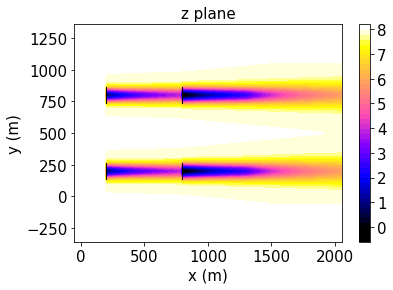

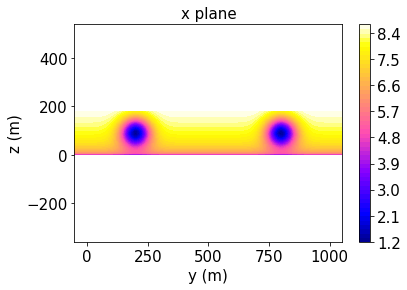

In [3]:
# start timer
t1 = time.time()
init_floris = Floris('{}.json'.format(case))
num_turbines = len(floris.farm.flow_field.turbine_map.turbine_map)

# determine initial power production
init_floris.farm.flow_field.calculate_wake()

# end timer and print time difference
t2 = time.time()
print('Time to compute wake = ', t2-t1, 's')

# calculate initial power and print
init_power = optimisation_manager.calc_power(init_floris)
print('Initial Power Output = ', init_power/10**6, ' MW')

# plot initial wake_field
ff_viz = init_floris.farm.flow_field
visualization_manager = VisualizationManager(ff_viz, init_name, plot_wakes=True)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Optimise Power Output for Turbine Locations Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5316691.15127381
            Iterations: 2
            Function evaluations: 20
            Gradient evaluations: 2
basinhopping step 0: f -5.31669e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6839940.742461903
            Iterations: 25
            Function evaluations: 286
            Gradient evaluations: 25
basinhopping step 1: f -6.83994e+06 trial_f -6.83994e+06 accepted 1  lowest_f -6.83994e+06
found new global minimum on step 1 with function value -6.83994e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848016.3964635935
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 4
basinhopping step 2: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848017.565172985
            Iterations: 3
            Function evaluations: 30
            Gradient evaluations: 3
basinhopping step 24: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step 24 with function value -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848017.59938357
            Iterations: 3
            Function evaluations: 30
            Gradient evaluations: 3
basinhopping step 25: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
found new global minimum on step 25 with function value -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848017.607061911
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 26: f -6.84802e+06 trial_f -6.8480

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.392674309
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 49: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
adaptive stepsize: acceptance rate 0.980000 target 0.500000 new stepsize 0.555556 old stepsize 0.5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.403048616
            Iterations: 1
            Function evaluations: 21
            Gradient evaluations: 1
basinhopping step 50: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.399348017
            Iterations: 2
            Function evaluations: 31
            Gradient evaluations: 2
basinhopping step 51: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+0

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.424651544
            Iterations: 2
            Function evaluations: 20
            Gradient evaluations: 2
basinhopping step 75: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.427442486
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3
basinhopping step 76: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.423888692
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 77: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -68480

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.8576363595
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 100: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Optimised  Parameters:
Turbine 0 parameter layout_x = 121.09058988967004
Turbine 1 parameter layout_x = 997.2255724320488
Turbine 2 parameter layout_x = 808.1039826289469
Turbine 3 parameter layout_x = 796.7915029518254
Turbine 0 parameter layout_y = 500.5793581209697
Turbine 1 parameter layout_y = 18.97131284835873
Turbine 2 parameter layout_y = 203.35577152288852
Turbine 3 parameter layout_y = 801.9034219811774
Initial Power Output = 5.102218332510335 MW
Optimised, Power Output = 6.84801886442941 MW
Power increased by 34.216499925045866%
Time to optimise wake = 28.69648003578186 s


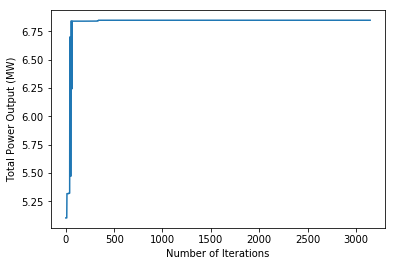

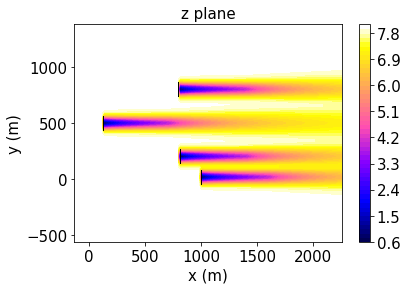

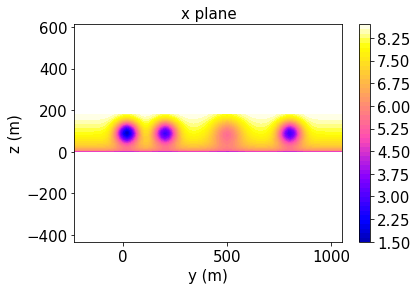

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_subopt_power = loc_data[2][iteration - 1]\nloc_subopt_params = loc_data[3][iteration - 1]\noptimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [4]:
imp.reload(optimisation_manager)
loc_floris = Floris('{}.json'.format(case))
loc_variables=['layout_x', 'layout_y']

# set bounds for the optimization on the turbine locations
minimum_values = [0.0, 0.0]
maximum_values = [1000.0, 1000.0]

# compute the optimal turbine locations
loc_opt_params, loc_opt_power, loc_data = optimisation_manager.optimise_func(loc_floris, loc_variables, minimum_values, maximum_values, loc_name, case, global_search=True)

# print output at half-way iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_subopt_power = loc_data[2][iteration - 1]
loc_subopt_params = loc_data[3][iteration - 1]
optimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle after Turbine Location with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.857636379
            Iterations: 1
            Function evaluations: 14
            Gradient evaluations: 1
basinhopping step 0: f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6473612.678850304
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -6.84802e+06 trial_f -6.47361e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5786843.189258426
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -6.84802e+06 trial_f -5.78684e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current fun

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6315890.163283205
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 26: f -6.84802e+06 trial_f -6.31589e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5787608.411634358
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 27: f -6.84802e+06 trial_f -5.78761e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5893116.873214396
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 28: f -6.84802e+06 trial_f -5.89312e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6404646.256037649
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 51: f -6.84802e+06 trial_f -6.40465e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5995923.633870852
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 52: f -6.84802e+06 trial_f -5.99592e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5943217.121815762
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 53: f -6.84802e+06 trial_f -5.94322e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6848018.857636378
            Iterations: 16
            Function evaluations: 95
            Gradient evaluations: 13
basinhopping step 75: f -6.84802e+06 trial_f -6.84802e+06 accepted 1  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5955236.334836449
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 76: f -6.84802e+06 trial_f -5.95524e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6238822.221891049
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 77: f -6.84802e+06 trial_f -6.23882e+06 accepted 0  lowest_f -6.84802e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Cur

Optimised  Parameters:
Turbine 0 parameter yaw_angle = 1.0607120580332708e-07
Turbine 1 parameter yaw_angle = -1.2044800677738949e-08
Turbine 2 parameter yaw_angle = -7.649240574294732e-09
Turbine 3 parameter yaw_angle = -1.6056261004880804e-08
Initial Power Output = 6.84801885763636 MW
Optimised, Power Output = 6.848018857636381 MW
Power increased by 3.1279731644239965e-13%
Time to optimise wake = 17.328860759735107 s


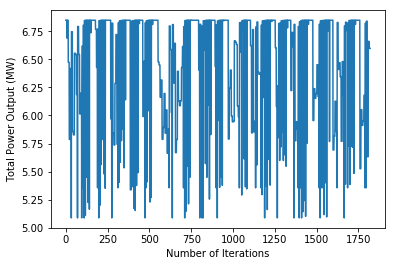

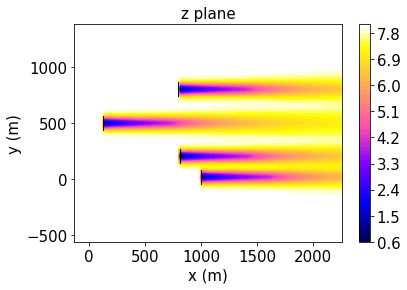

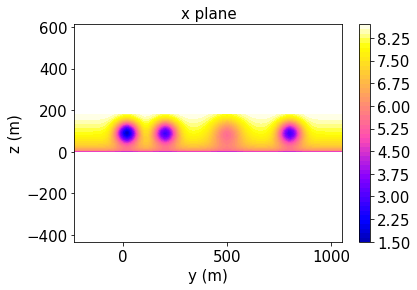

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]\nloc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]\noptimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [5]:
# set variable(s) to optimise for
imp.reload(optimisation_manager)
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

# compute the optimal yaw angles
loc_yaw_opt_params, loc_yaw_opt_power, loc_yaw_data = optimisation_manager.optimise_func(loc_floris, yaw_variables, minimum_values, maximum_values, loc_yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]
loc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]
optimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5267807.626687661
            Iterations: 8
            Function evaluations: 27
            Gradient evaluations: 4
basinhopping step 1: f -5.26781e+06 trial_f -5.26781e+06 accepted 1  lowest_f -5.26781e+06
found new global minimum on step 1 with function value -5.26781e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5036887.244491175
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.26781e+06 trial_f -5.03689e+06 accepted 0  lowest_f -5.26781e+06
Positive directiona

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4989361.431216125
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.29132e+06 trial_f -4.98936e+06 accepted 0  lowest_f -5.29132e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5254304.676417255
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 24: f -5.29132e+06 trial_f -5.2543e+06 accepted 0  lowest_f -5.29132e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5195300.544085667
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 25: f -5.29132e+06 trial_f -5.1953e+06 accepted 0  lowest_f -5.29132e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4979996.278311721
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 48: f -5.31332e+06 trial_f -4.98e+06 accepted 0  lowest_f -5.31332e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4949978.380669696
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 49: f -5.31332e+06 trial_f -4.94998e+06 accepted 0  lowest_f -5.31332e+06
adaptive stepsize: acceptance rate 0.080000 target 0.500000 new stepsize 0.45 old stepsize 0.5
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5094173.143199684
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 50: f -5.31332e+06 trial_f -5.09417e+06 accepted 0  low

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5294774.748719029
            Iterations: 8
            Function evaluations: 27
            Gradient evaluations: 4
basinhopping step 71: f -5.31332e+06 trial_f -5.29477e+06 accepted 0  lowest_f -5.31332e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5237388.095618832
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 72: f -5.31332e+06 trial_f -5.23739e+06 accepted 0  lowest_f -5.31332e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5296264.927678658
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 73: f -5.31332e+06 trial_f -5.29626e+06 accepted 0  lowest_f -5.31332e+06
Positive directional derivative for linesearch    (Exit mode 8)
      

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4976121.696556704
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 96: f -5.31422e+06 trial_f -4.97612e+06 accepted 0  lowest_f -5.31422e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5056699.252885754
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 97: f -5.31422e+06 trial_f -5.0567e+06 accepted 0  lowest_f -5.31422e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5069799.9162686225
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 98: f -5.31422e+06 trial_f -5.0698e+06 accepted 0  lowest_f -5.31422e+06
Positive directional derivative for linesearch    (Exit mode 8)
          

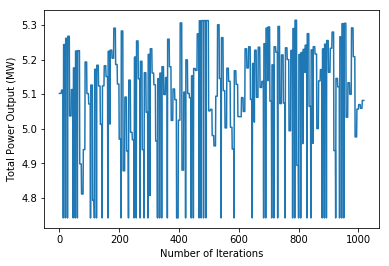

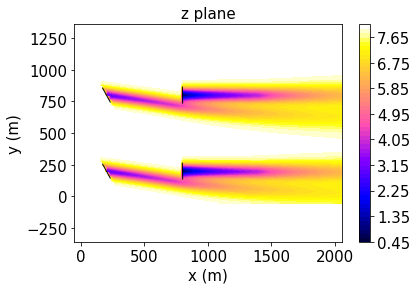

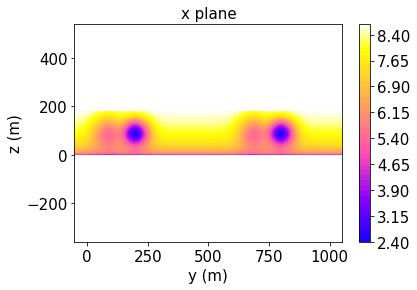

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nyaw_subopt_power = data[2][iteration - 1]\nyaw_subopt_params = data[3][iteration - 1]\noptimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [6]:
# set variable(s) to optimise for
yaw_floris = Floris('{}.json'.format(case))
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

# compute the optimal yaw angles
yaw_opt_params, yaw_opt_power, yaw_data = optimisation_manager.optimise_func(yaw_floris, yaw_variables, minimum_values, maximum_values, yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
yaw_subopt_power = data[2][iteration - 1]
yaw_subopt_params = data[3][iteration - 1]
optimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Evolution of Optimisation

Iteration #0, Power Output = 6.84801885763636 MW


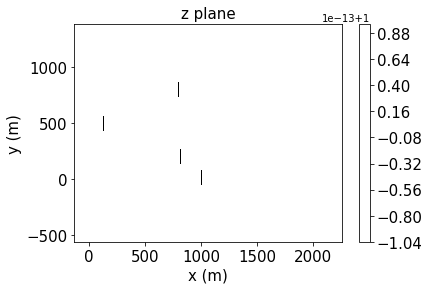

Iteration #18, Power Output = 6.473612693584428 MW


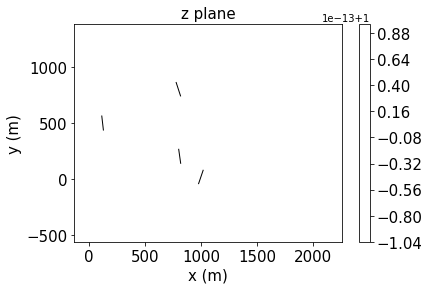

Iteration #36, Power Output = 6.745781759697898 MW


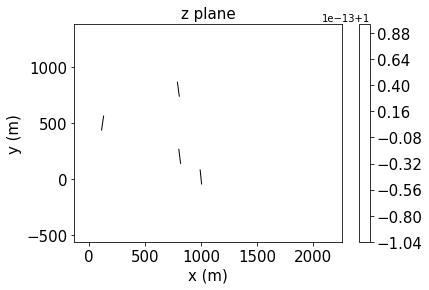

Iteration #54, Power Output = 6.554435406443043 MW


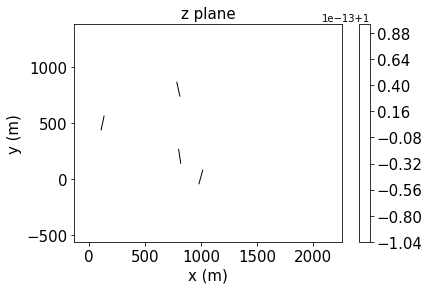

Iteration #72, Power Output = 6.792467362968652 MW


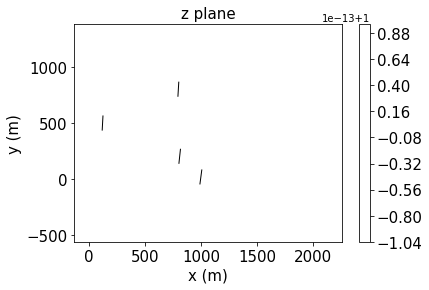

Iteration #90, Power Output = 6.198607700664085 MW


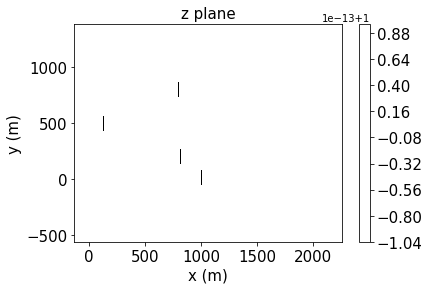

Iteration #108, Power Output = 6.802687090575401 MW


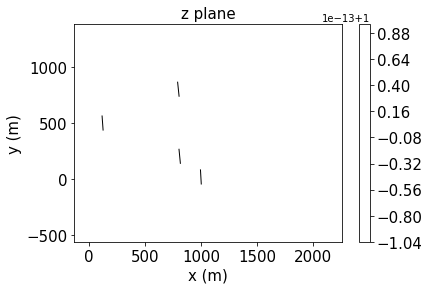

Iteration #126, Power Output = 6.835367291593813 MW


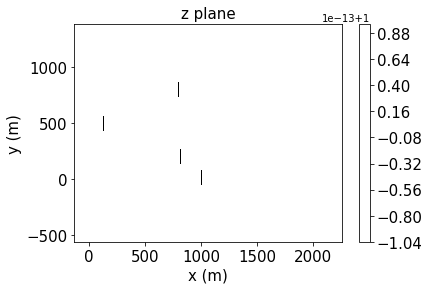

Iteration #144, Power Output = 6.848017664354037 MW


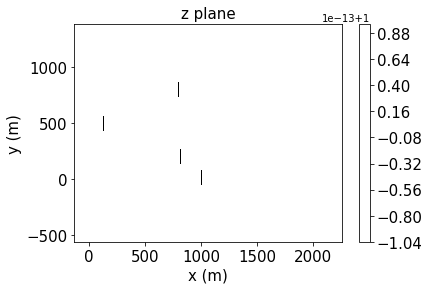

Iteration #162, Power Output = 6.848018857365631 MW


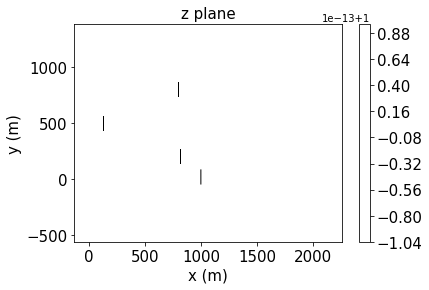

Iteration #180, Power Output = 6.767195398849875 MW


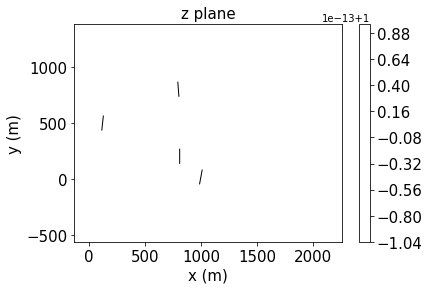

Iteration #198, Power Output = 6.844105830788417 MW


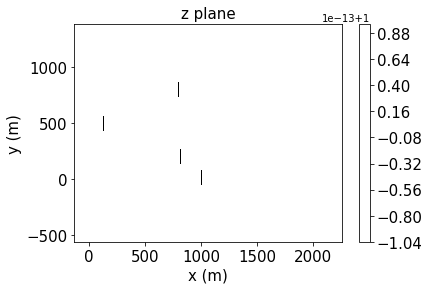

Iteration #216, Power Output = 6.847674911766188 MW


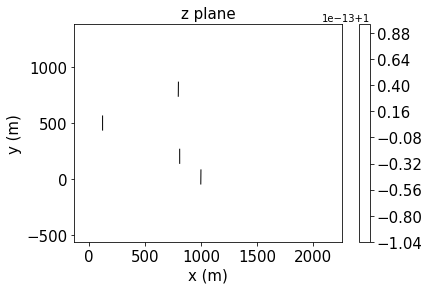

Iteration #234, Power Output = 6.848017479889983 MW


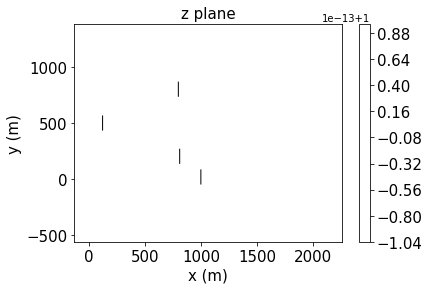

Iteration #252, Power Output = 6.848018856444761 MW


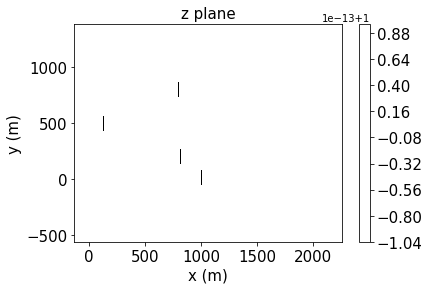

Iteration #270, Power Output = 5.9699143090183675 MW


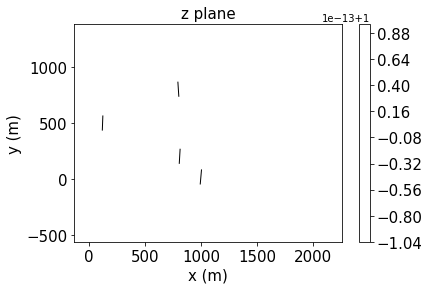

Iteration #288, Power Output = 5.737108010378819 MW


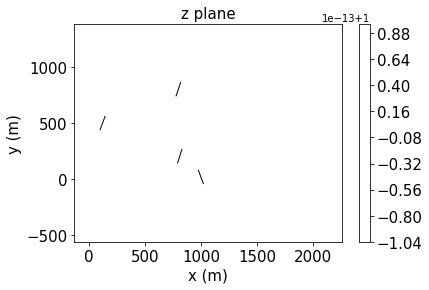

Iteration #306, Power Output = 5.744870152165877 MW


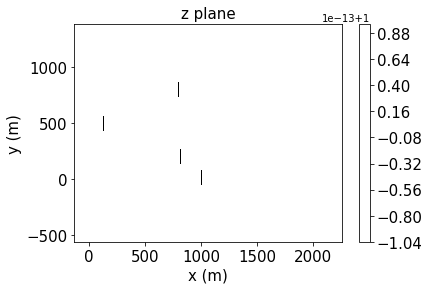

Iteration #324, Power Output = 6.840782176230475 MW


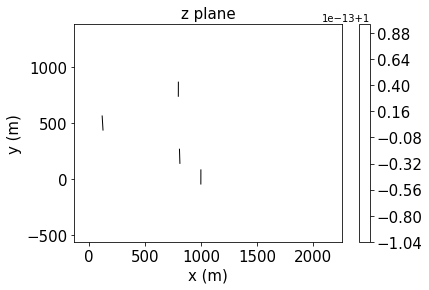

Iteration #342, Power Output = 6.842414327191789 MW


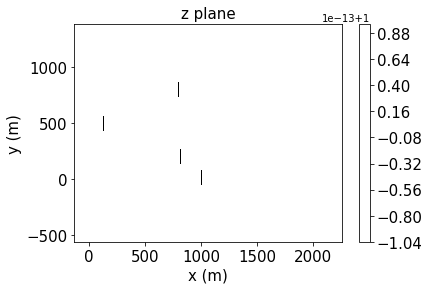

Iteration #360, Power Output = 6.848017276065865 MW


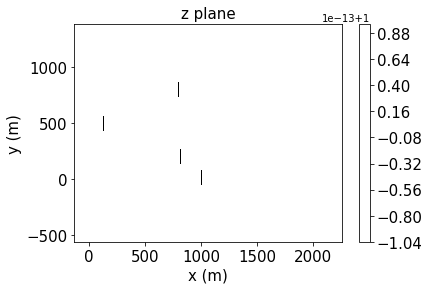

Iteration #378, Power Output = 6.848018543318911 MW


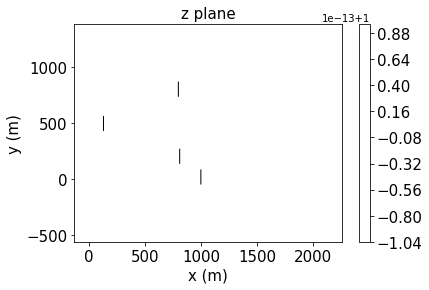

Iteration #396, Power Output = 6.8396934215399865 MW


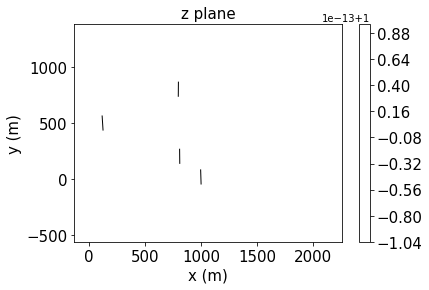

Iteration #414, Power Output = 6.847362533595847 MW


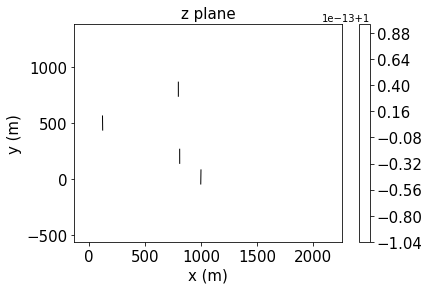

Iteration #432, Power Output = 6.837998120414426 MW


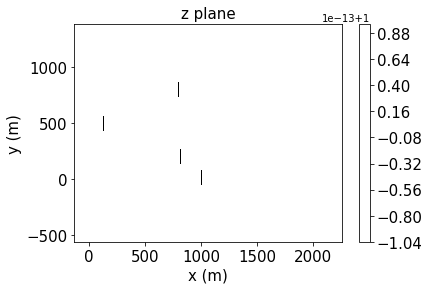

Iteration #450, Power Output = 6.8480188542118485 MW


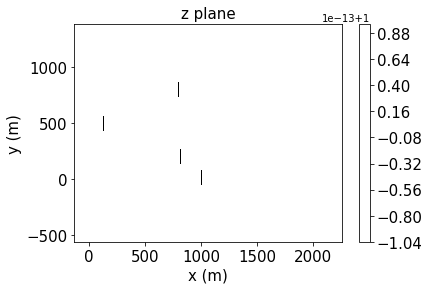

Iteration #468, Power Output = 6.481461006248427 MW


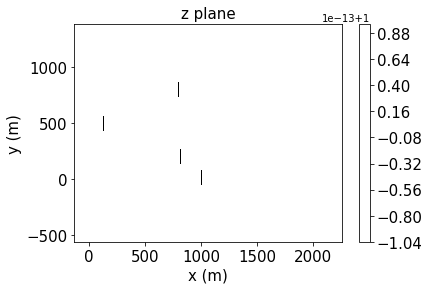

Iteration #486, Power Output = 6.843500087966616 MW


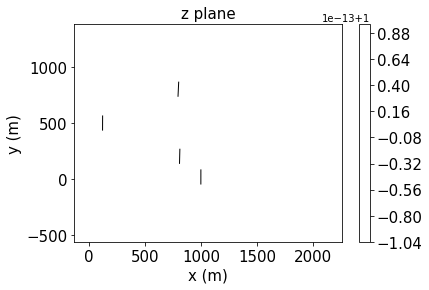

Iteration #504, Power Output = 6.836674950523519 MW


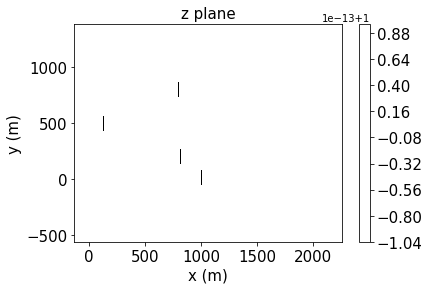

Iteration #522, Power Output = 6.8479962215743235 MW


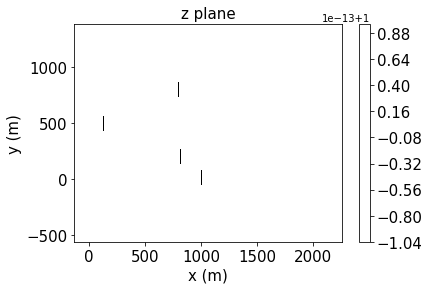

Iteration #540, Power Output = 6.8480188576018595 MW


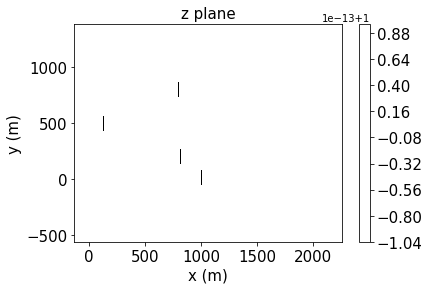

Iteration #558, Power Output = 6.4493317610099705 MW


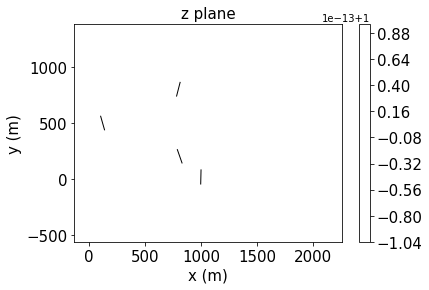

Iteration #576, Power Output = 5.787608411634357 MW


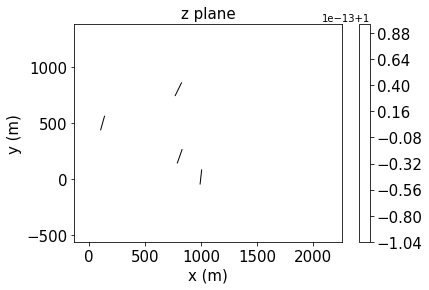

Iteration #594, Power Output = 5.842823037422722 MW


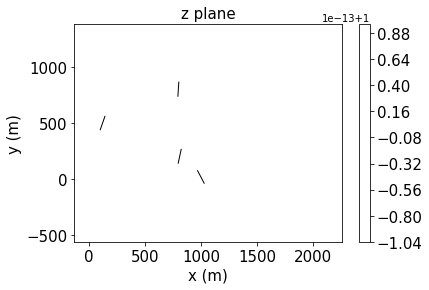

Iteration #612, Power Output = 5.8773588210989685 MW


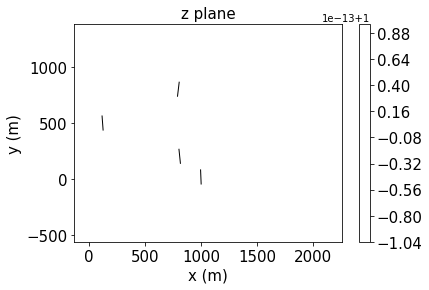

Iteration #630, Power Output = 6.5879397779063655 MW


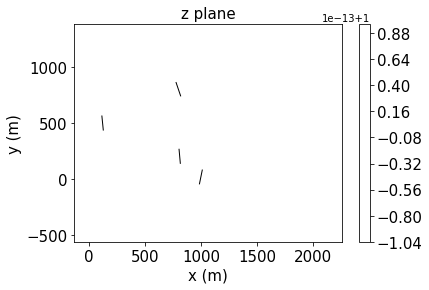

Iteration #648, Power Output = 6.289552017576362 MW


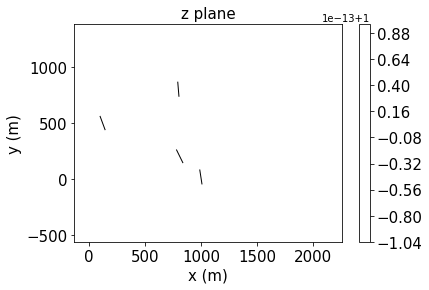

Iteration #666, Power Output = 5.785903979307266 MW


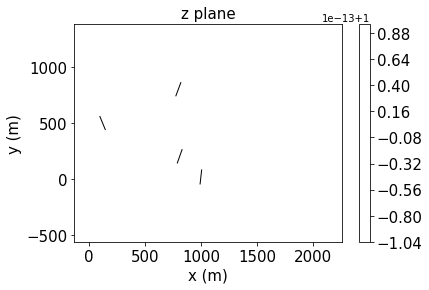

Iteration #684, Power Output = 6.087001817123455 MW


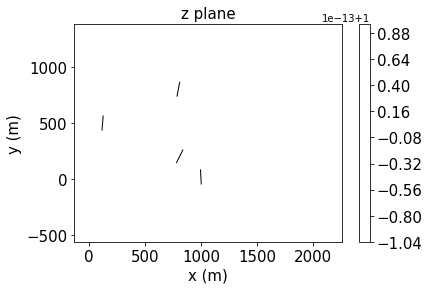

Iteration #702, Power Output = 6.614585276250325 MW


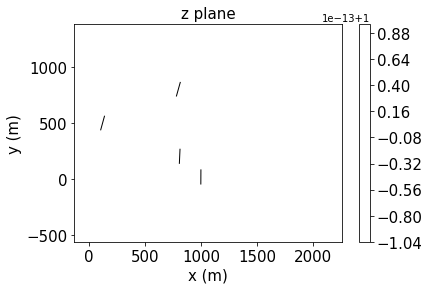

Iteration #720, Power Output = 6.847433322682814 MW


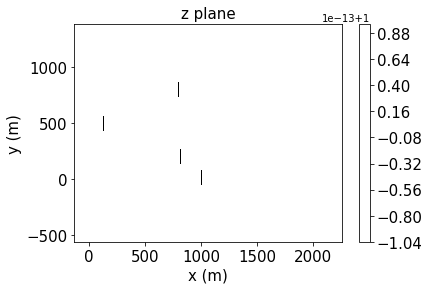

Iteration #738, Power Output = 6.847902767992048 MW


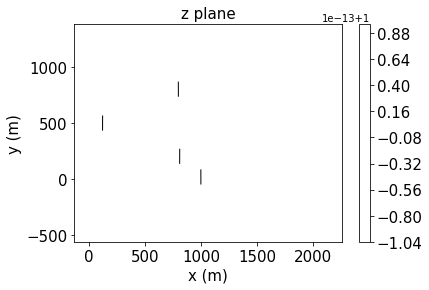

Iteration #756, Power Output = 6.848016326185386 MW


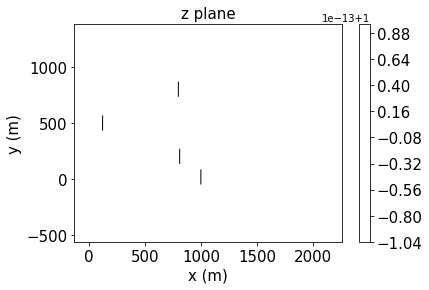

Iteration #774, Power Output = 6.8480188350692925 MW


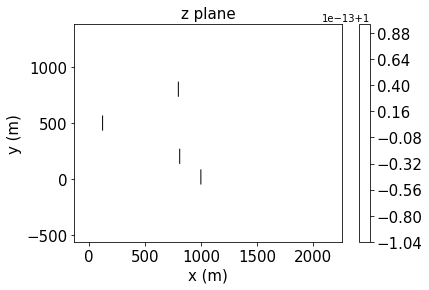

Iteration #792, Power Output = 6.848018857636375 MW


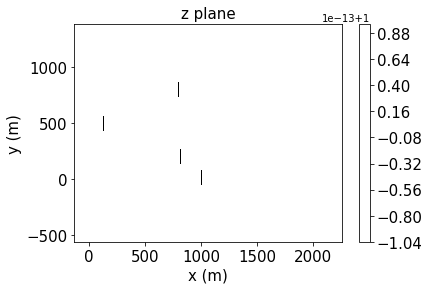

Iteration #810, Power Output = 6.119552715711464 MW


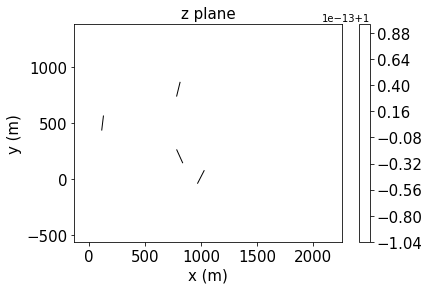

Iteration #828, Power Output = 6.579402631748859 MW


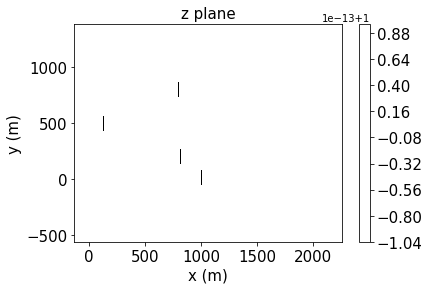

Iteration #846, Power Output = 6.847629680228932 MW


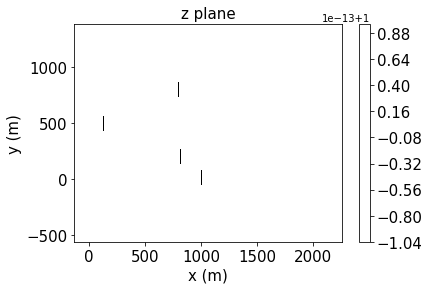

Iteration #864, Power Output = 6.84796977705545 MW


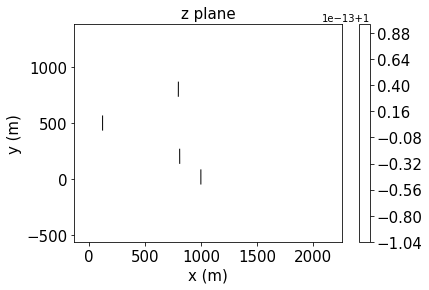

Iteration #882, Power Output = 6.848018857236588 MW


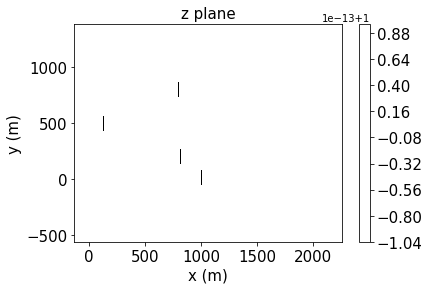

Iteration #900, Power Output = 6.8071945899617985 MW


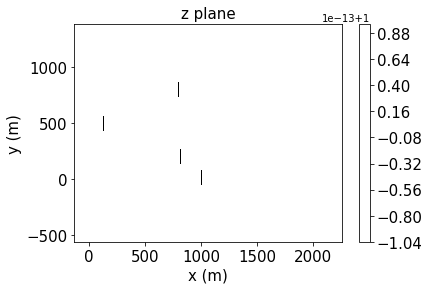

Iteration #918, Power Output = 6.846218952994281 MW


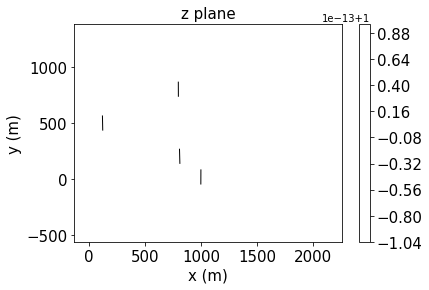

Iteration #936, Power Output = 5.377783601575145 MW


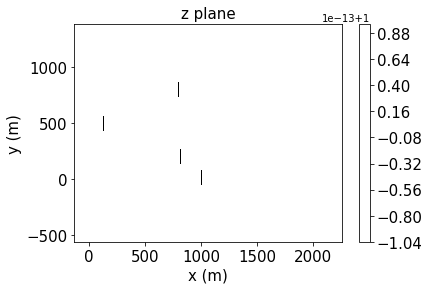

Iteration #954, Power Output = 6.848018769870348 MW


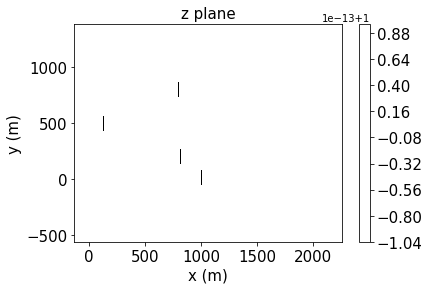

Iteration #972, Power Output = 5.790069566934564 MW


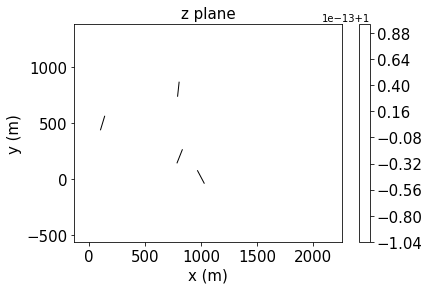

Iteration #990, Power Output = 5.995923633870852 MW


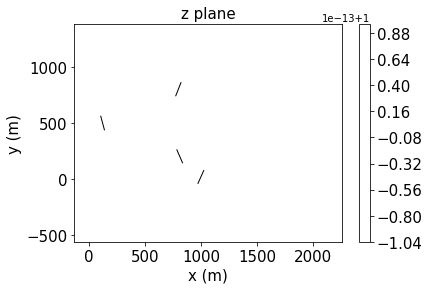

Iteration #1008, Power Output = 6.665501425897121 MW


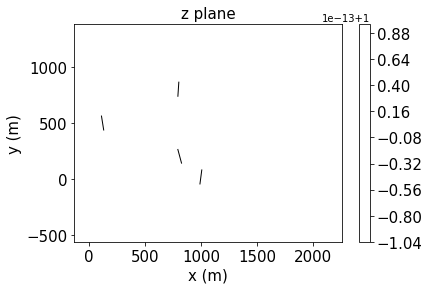

Iteration #1026, Power Output = 6.08578669513723 MW


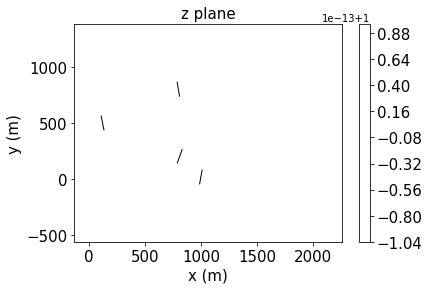

Iteration #1044, Power Output = 6.826747763198715 MW


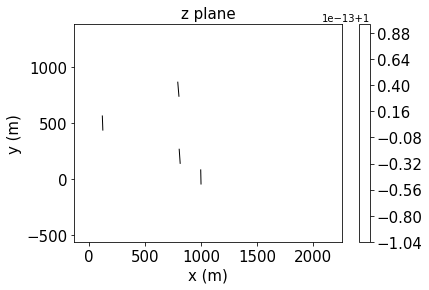

Iteration #1062, Power Output = 6.847354536589947 MW


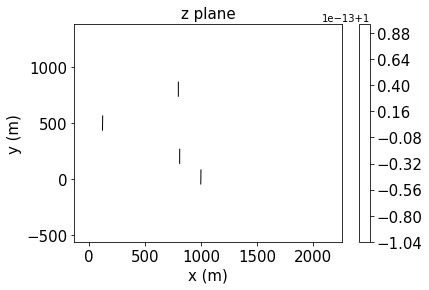

Iteration #1080, Power Output = 6.848014158221342 MW


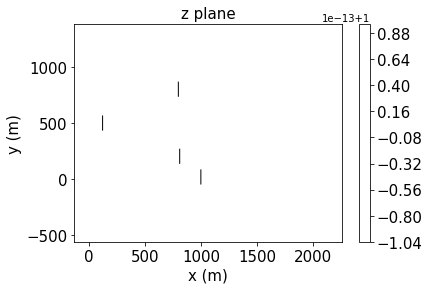

Iteration #1098, Power Output = 6.848018857589958 MW


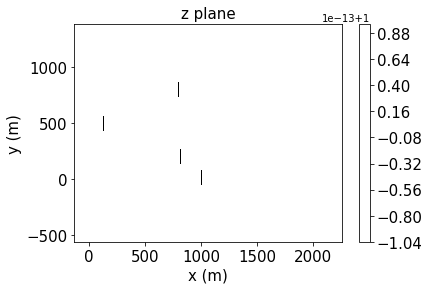

Iteration #1116, Power Output = 5.844879337835751 MW


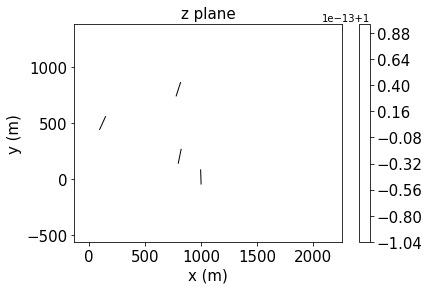

Iteration #1134, Power Output = 5.948095764263295 MW


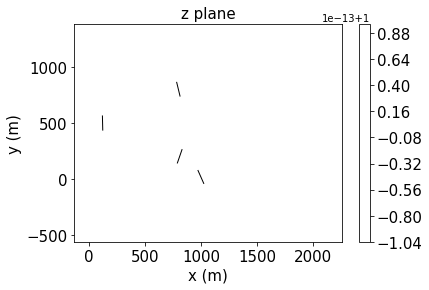

Iteration #1152, Power Output = 6.38831846014234 MW


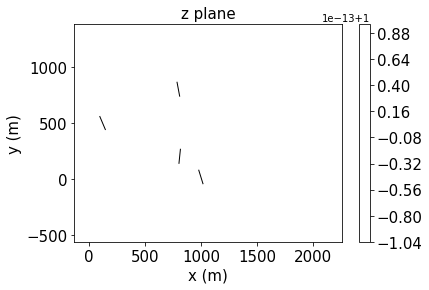

Iteration #1170, Power Output = 6.802925885745002 MW


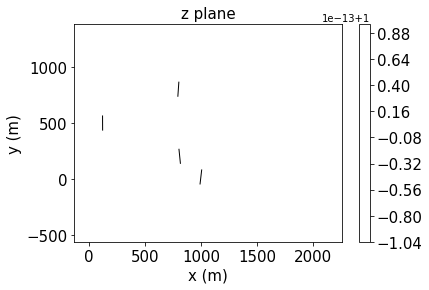

Iteration #1188, Power Output = 6.841782419835598 MW


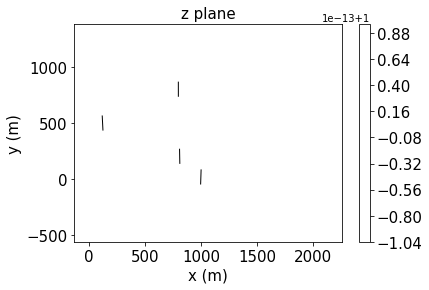

Iteration #1206, Power Output = 6.836931180948658 MW


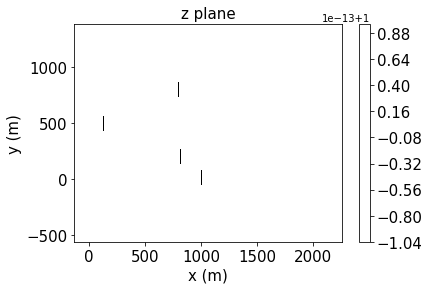

Iteration #1224, Power Output = 6.847864930551805 MW


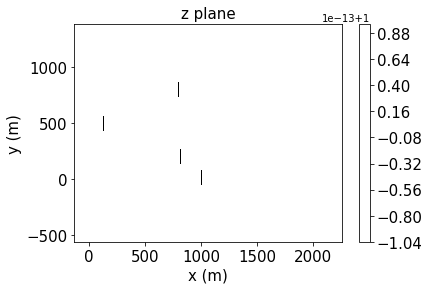

Iteration #1242, Power Output = 6.848018857632016 MW


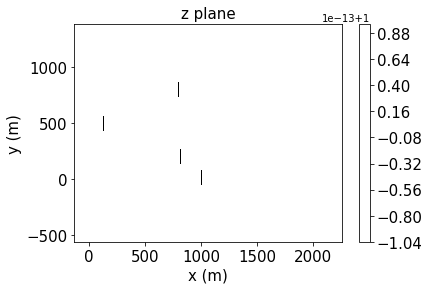

Iteration #1260, Power Output = 6.080891396578653 MW


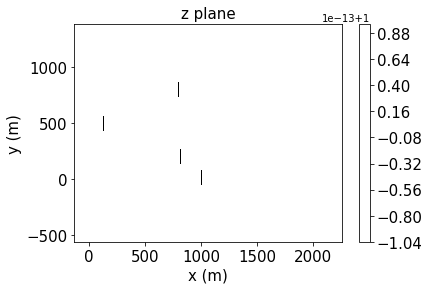

Iteration #1278, Power Output = 6.819814829976398 MW


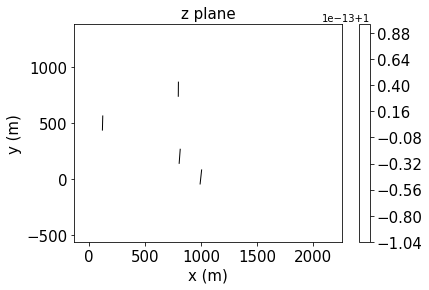

Iteration #1296, Power Output = 6.844976770393353 MW


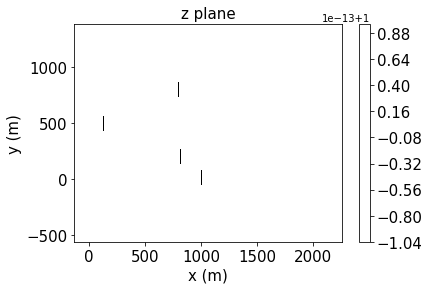

Iteration #1314, Power Output = 6.847856670749294 MW


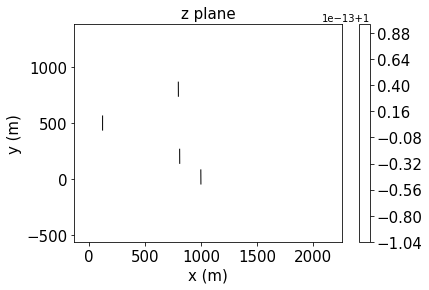

Iteration #1332, Power Output = 6.847990965713062 MW


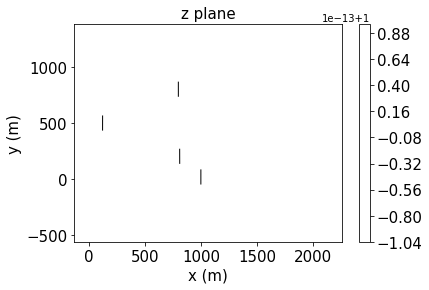

Iteration #1350, Power Output = 6.222226172909114 MW


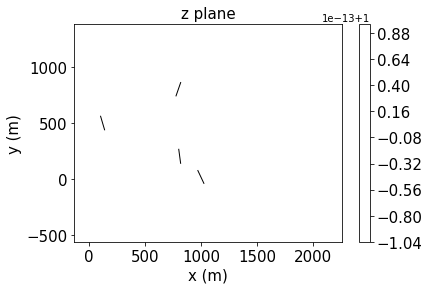

Iteration #1368, Power Output = 6.811159405463844 MW


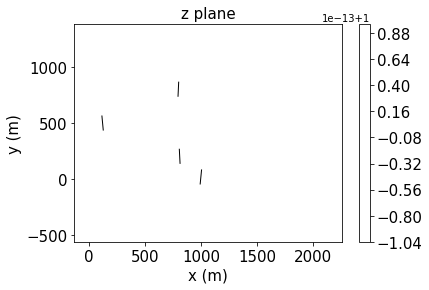

Iteration #1386, Power Output = 5.875239260913845 MW


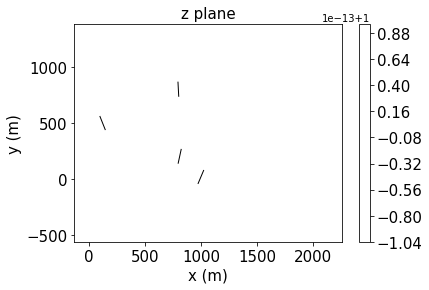

Iteration #1404, Power Output = 6.8426200377126785 MW


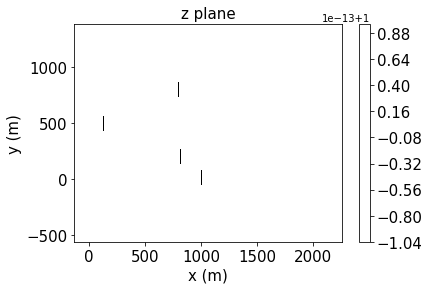

Iteration #1422, Power Output = 6.847659501810831 MW


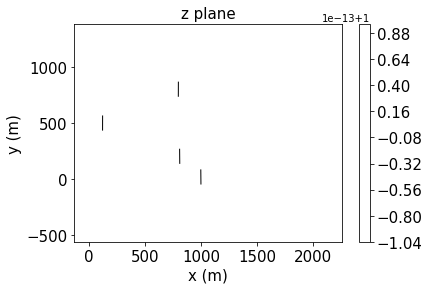

Iteration #1440, Power Output = 6.847999114245257 MW


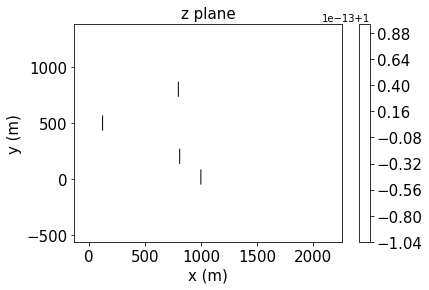

Iteration #1458, Power Output = 6.847999346804656 MW


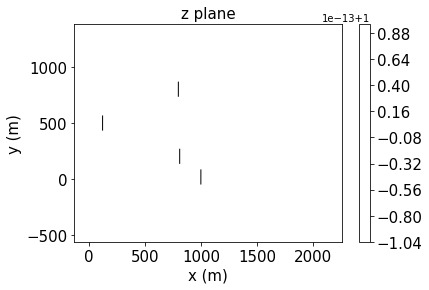

Iteration #1476, Power Output = 6.848018857636378 MW


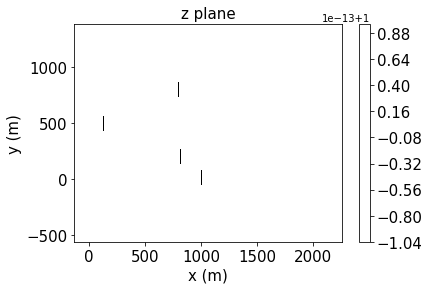

Iteration #1494, Power Output = 6.153110577015953 MW


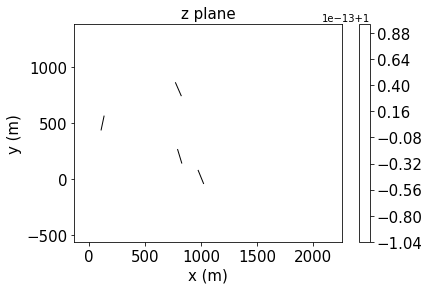

Iteration #1512, Power Output = 6.169058087828586 MW


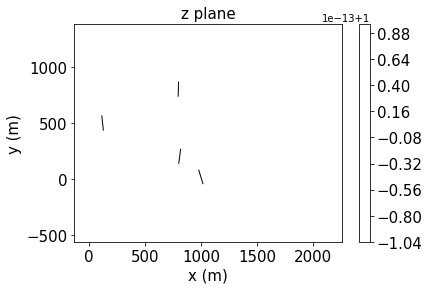

Iteration #1530, Power Output = 6.844915075784681 MW


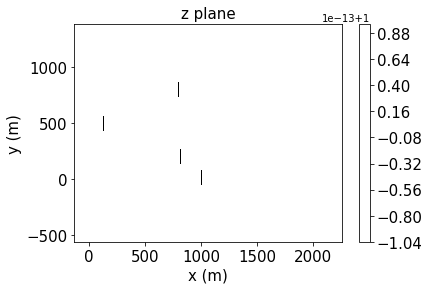

Iteration #1548, Power Output = 6.847931593151271 MW


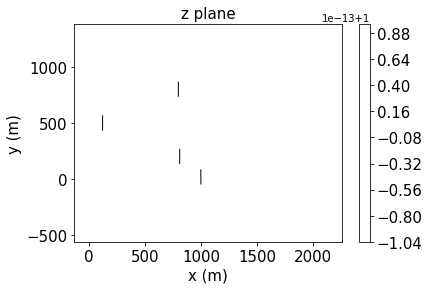

Iteration #1566, Power Output = 6.848001849802706 MW


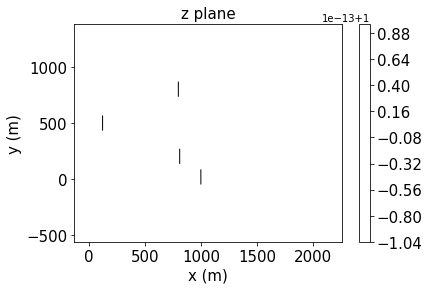

Iteration #1584, Power Output = 6.848018785034786 MW


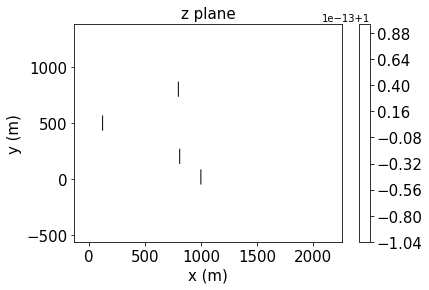

Iteration #1602, Power Output = 5.692562788600408 MW


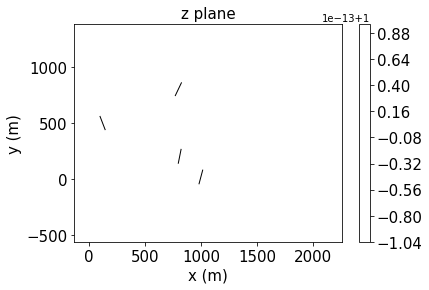

Iteration #1620, Power Output = 5.857754428033116 MW


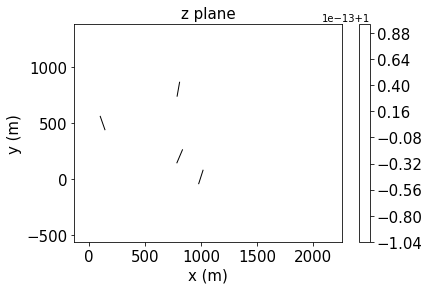

Iteration #1638, Power Output = 6.470136238107367 MW


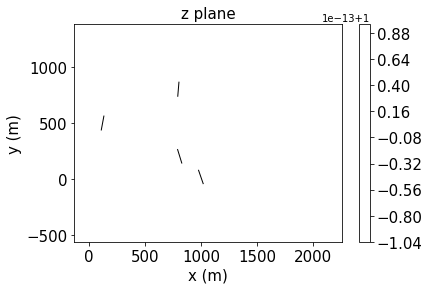

Iteration #1656, Power Output = 6.479774459168071 MW


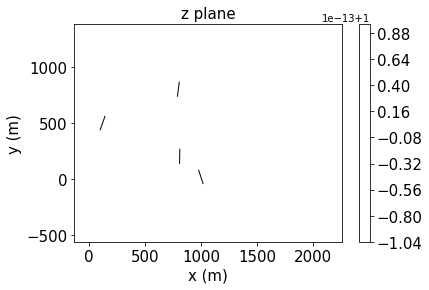

Iteration #1674, Power Output = 6.8305189505160095 MW


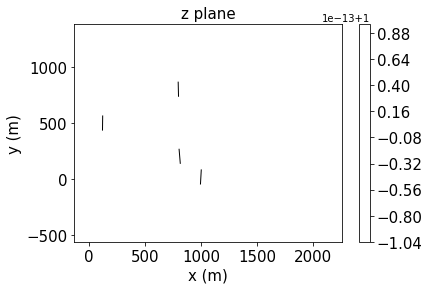

Iteration #1692, Power Output = 5.7269494736871795 MW


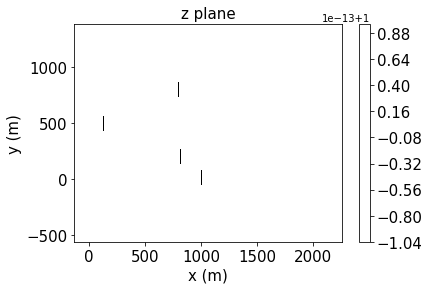

Iteration #1710, Power Output = 6.847934541695742 MW


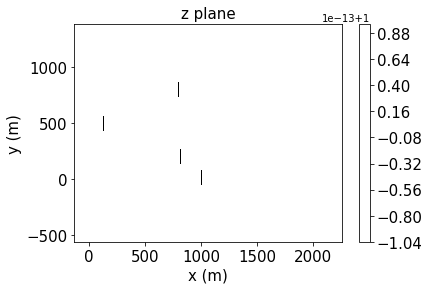

Iteration #1728, Power Output = 6.848014795546878 MW


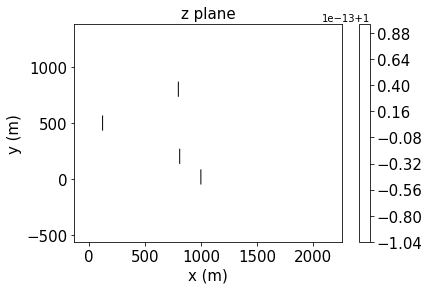

Iteration #1746, Power Output = 6.848018317183948 MW


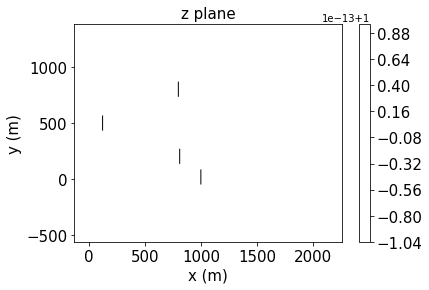

Iteration #1764, Power Output = 5.526089051669212 MW


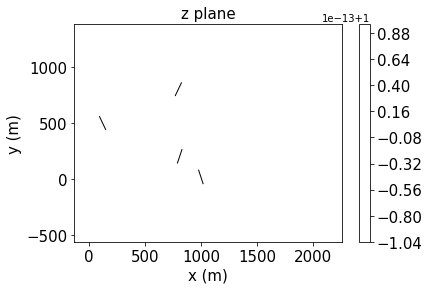

Iteration #1782, Power Output = 5.949978053044543 MW


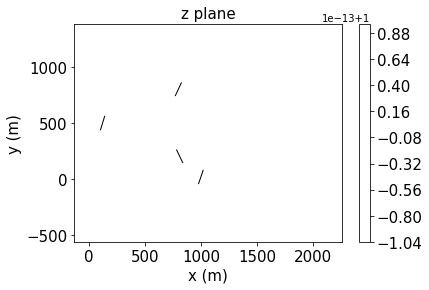

Iteration #1800, Power Output = 6.839853503159981 MW


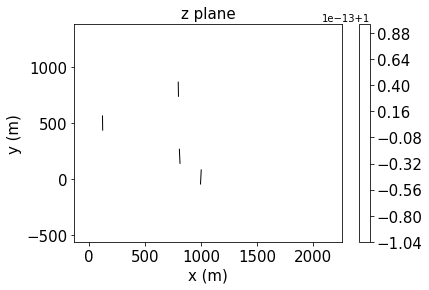

Iteration #1818, Power Output = 6.597211357893486 MW


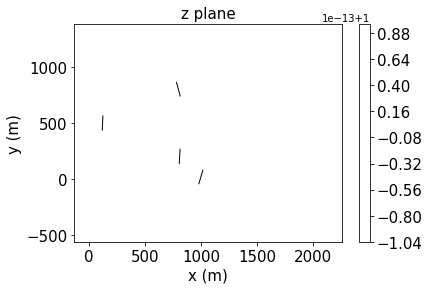

"\nnum_iterations = len(evolution_data[1])\nincrement = np.int(num_iterations / 100)\nfor i in range(0, num_iterations, increment):\n    floris_viz = optimisation_manager.set_iteration_data(evolution_data[3][i], floris, evolution_variables)\n    flow_field_viz = floris_viz.farm.flow_field\n    visualization_manager = VisualizationManager(flow_field_viz, evolution_name, plot_wakes=False)\n    print('Iteration #{}, Power Output = {} MW'.format(i, evolution_data[2][i]))\n    visualization_manager.plot_z_planes([0.5])\n"

In [57]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# print evolution of optimised turbine locations

evolution_name = loc_yaw_name
evolution_data = loc_yaw_data
evolution_variables = yaw_variables
num_plots = 100

optimisation_manager.print_evolution(floris, evolution_name, evolution_data, evolution_variables, num_plots)


## Wake vs Flow Direction

../imperial_floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


Power Output at 185.0 degree Flow Direction = 0.07014308137026438 MW


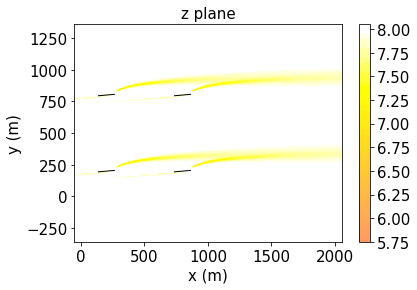

Power Output at 195.0 degree Flow Direction = 0.5428267719617309 MW


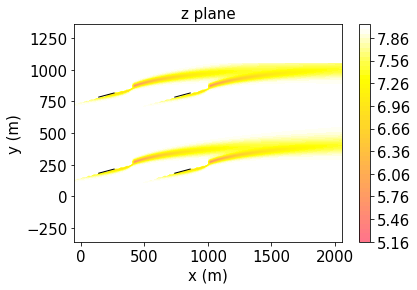

Power Output at 205.0 degree Flow Direction = 1.3646176616616177 MW


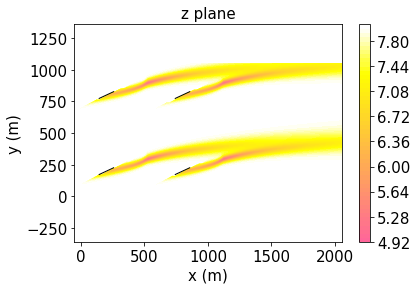

Power Output at 215.0 degree Flow Direction = 2.4230879423395506 MW


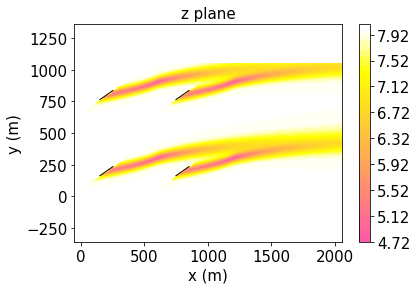

Power Output at 225.0 degree Flow Direction = 3.587832816424236 MW


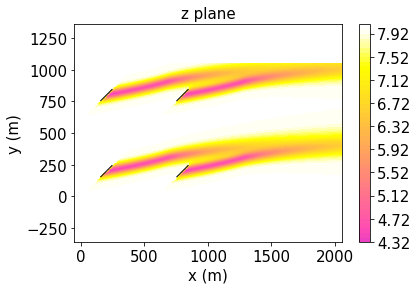

Power Output at 235.0 degree Flow Direction = 4.670751685672154 MW


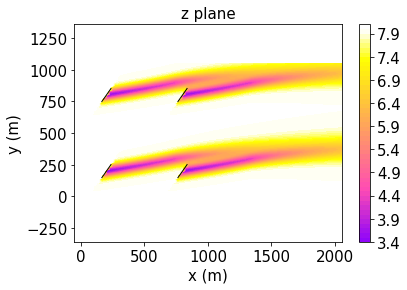

Power Output at 245.0 degree Flow Direction = 5.268126327796782 MW


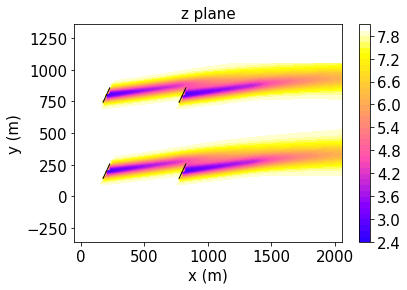

Power Output at 255.0 degree Flow Direction = 5.013262796277975 MW


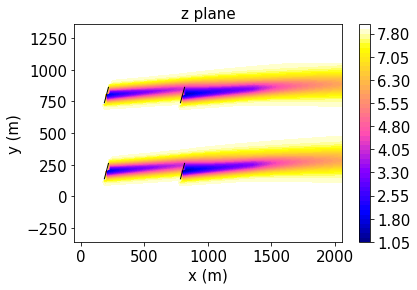

Power Output at 265.0 degree Flow Direction = 4.498591244341967 MW


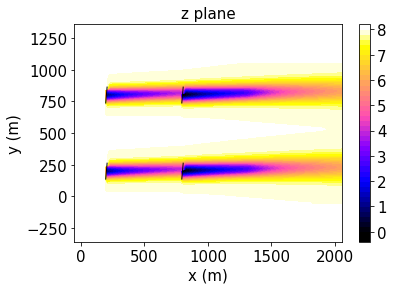

Power Output at 275.0 degree Flow Direction = 4.498591244341968 MW


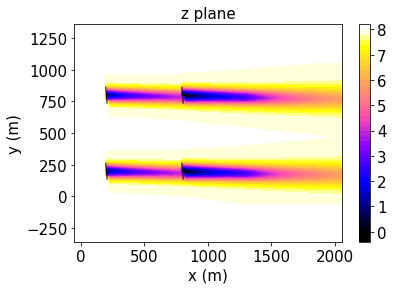

Power Output at 285.0 degree Flow Direction = 5.01326279627798 MW


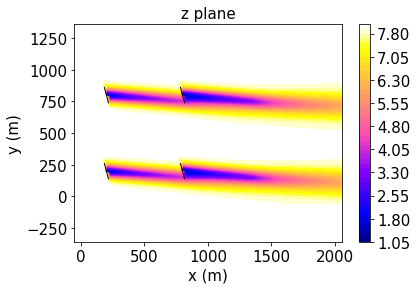

Power Output at 295.0 degree Flow Direction = 5.268126327796785 MW


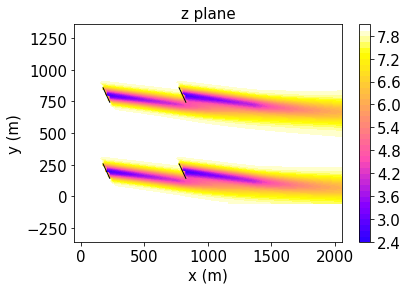

Power Output at 305.0 degree Flow Direction = 4.670751685672155 MW


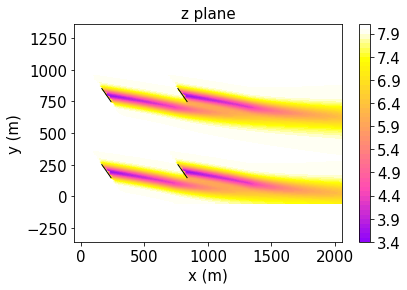

Power Output at 315.0 degree Flow Direction = 3.587832816424235 MW


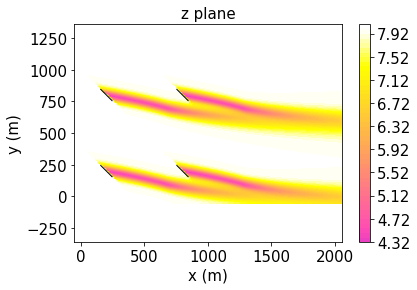

Power Output at 325.0 degree Flow Direction = 2.42308794233955 MW


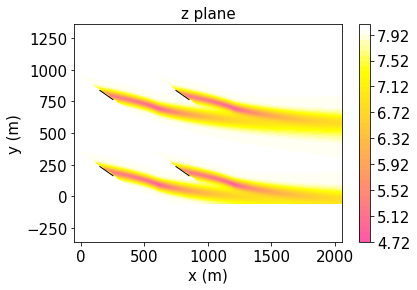

Power Output at 335.0 degree Flow Direction = 1.3646176616616177 MW


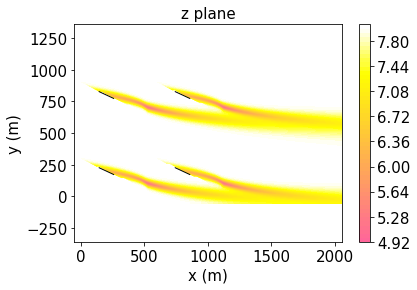

Power Output at 345.0 degree Flow Direction = 0.5428267719617309 MW


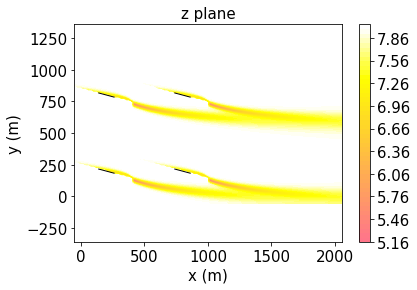

Text(0,0.5,'Power Output (MW)')

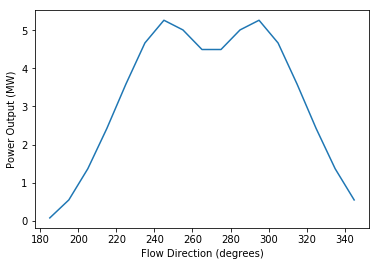

In [54]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
direction_floris = Floris('{}.json'.format(case))
direction_name = '{}_direction'.format(case)

turbines = [turbine for _, turbine in direction_floris.farm.flow_field.turbine_map.items()]
num_turbines = len(turbines)
angles = []
power = []

for d in range(-85, 85, 10):
    #direction_floris.farm.flow_field.wind_direction = np.float(d)
    optimisation_manager.set_turbine_attr_vec(np.repeat(range(num_turbines), 1), np.repeat(turbines, 1), \
                     np.repeat(range(1), num_turbines, axis=0), np.repeat(['yaw_angle'], num_turbines, axis=0), \
                     np.ones(num_turbines) * np.radians(d), num_turbines)
    direction_floris.farm.flow_field.calculate_wake()
    flow_field_viz = direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, direction_name, plot_wakes=True)
    power.append(optimisation_manager.calc_power(direction_floris) / 10**6)
    angles.append(270.0 + d)
    print('Power Output at {} degree Flow Direction = {} MW'.format(angles[-1], power[-1]))
    visualization_manager.plot_z_planes([0.5])
    
fig, ax = plt.subplots()
ax.plot(angles, power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')

## Optimise Yaw Angle for Different Wind Directions

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5004958.731391567
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.10222e+06 trial_f -5.00496e+06 accepted 0  lowest_f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4968253.326221993
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.10222e+06 trial_f -4.96825e+06 accepted 0  lowest_f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current func

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5270828.959364113
            Iterations: 8
            Function evaluations: 27
            Gradient evaluations: 4
basinhopping step 22: f -5.31525e+06 trial_f -5.27083e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4925767.892116379
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.31525e+06 trial_f -4.92577e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5315253.556371504
            Iterations: 8
            Function evaluations: 29
            Gradient evaluations: 4
basinhopping step 24: f -5.31525e+06 trial_f -5.31525e+06 accepted 1  lowest_f -5.31525e+06
found new global minimum on step 24 with function value -5.31525e+06
Po

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5305121.235443608
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 46: f -5.31525e+06 trial_f -5.30512e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5219497.873830894
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 47: f -5.31525e+06 trial_f -5.2195e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5224410.746572112
            Iterations: 8
            Function evaluations: 27
            Gradient evaluations: 4
basinhopping step 48: f -5.31525e+06 trial_f -5.22441e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
       

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5197263.478522984
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 70: f -5.31525e+06 trial_f -5.19726e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5068433.511431379
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 71: f -5.31525e+06 trial_f -5.06843e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5290879.817891124
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 72: f -5.31525e+06 trial_f -5.29088e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5052573.793268865
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 93: f -5.31525e+06 trial_f -5.05257e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5082539.515585392
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 94: f -5.31525e+06 trial_f -5.08254e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5120813.583197443
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 95: f -5.31525e+06 trial_f -5.12081e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

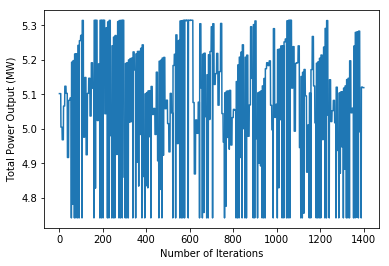

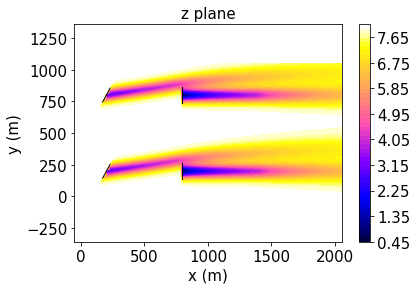

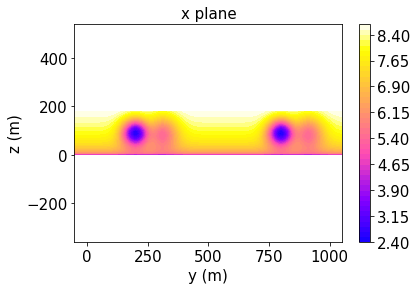

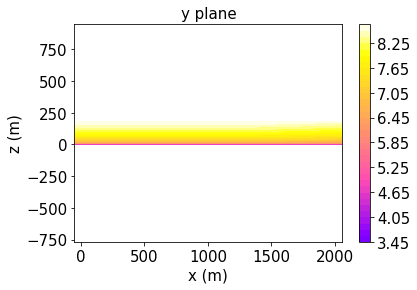


 Power Output at 270.0 degree Flow Direction = 5.823206050356285 MW 

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5797350.659635014
            Iterations: 5
            Function evaluations: 18
            Gradient evaluations: 3
basinhopping step 0: f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4796029.532069122
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.79735e+06 trial_f -4.79603e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5340283.94757019
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.79735e+06 trial_f -5.34028e+06 accepted 0  lowest_f -5.79735e+06
Positive directio

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5412999.91432861
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.79735e+06 trial_f -5.413e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5319832.26546967
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.79735e+06 trial_f -5.31983e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5096549.23959963
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 25: f -5.79735e+06 trial_f -5.09655e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Cu

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5480334.277096934
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 46: f -5.79735e+06 trial_f -5.48033e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5155026.500972101
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 47: f -5.79735e+06 trial_f -5.15503e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5760208.225759544
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 48: f -5.79735e+06 trial_f -5.76021e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5440889.790518838
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 69: f -5.79735e+06 trial_f -5.44089e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5540862.390332602
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 70: f -5.79735e+06 trial_f -5.54086e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5769387.386611356
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 71: f -5.79735e+06 trial_f -5.76939e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5410960.232521273
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 93: f -5.79735e+06 trial_f -5.41096e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5554175.446190804
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 94: f -5.79735e+06 trial_f -5.55418e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5026034.784949753
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 95: f -5.79735e+06 trial_f -5.02603e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

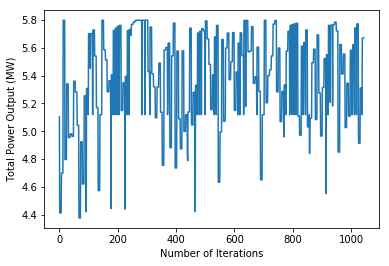

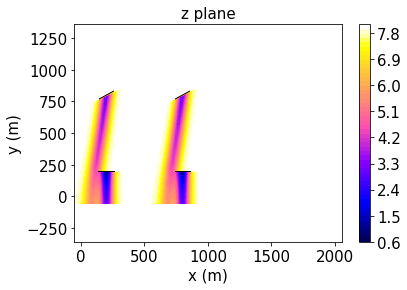

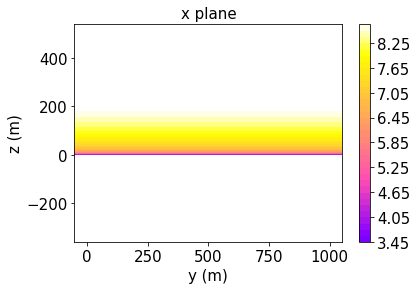

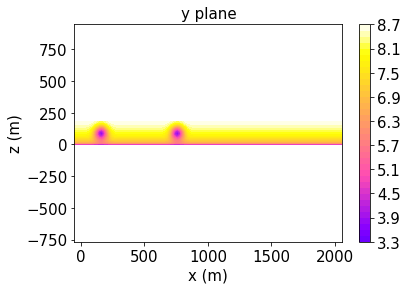


 Power Output at 180.0 degree Flow Direction = 5.637988781049593 MW 

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5253844.590504509
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 1: f -5.25384e+06 trial_f -5.25384e+06 accepted 1  lowest_f -5.25384e+06
found new global minimum on step 1 with function value -5.25384e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5152158.061991211
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.25384e+06 tri

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5315253.693334926
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 6
basinhopping step 22: f -5.31525e+06 trial_f -5.31525e+06 accepted 1  lowest_f -5.31525e+06
found new global minimum on step 22 with function value -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4957804.732425156
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.31525e+06 trial_f -4.9578e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4960734.056228301
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.31525e+06 trial_f -4.96073e+06 accepted 0  lowest_f -5.31525e+06
Pos

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5188600.593059341
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 46: f -5.31525e+06 trial_f -5.1886e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5049080.768960877
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 47: f -5.31525e+06 trial_f -5.04908e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5013777.9484609645
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 48: f -5.31525e+06 trial_f -5.01378e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5265622.710541472
            Iterations: 9
            Function evaluations: 34
            Gradient evaluations: 5
basinhopping step 69: f -5.31525e+06 trial_f -5.26562e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5212300.472237388
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 70: f -5.31525e+06 trial_f -5.2123e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5195284.282296082
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 71: f -5.31525e+06 trial_f -5.19528e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4970050.582450751
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 93: f -5.31525e+06 trial_f -4.97005e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5128286.323059881
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 94: f -5.31525e+06 trial_f -5.12829e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5059377.673915327
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 95: f -5.31525e+06 trial_f -5.05938e+06 accepted 0  lowest_f -5.31525e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

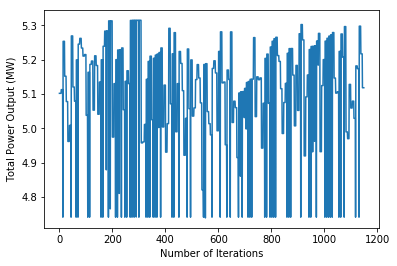

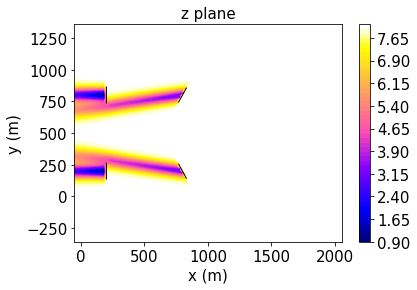

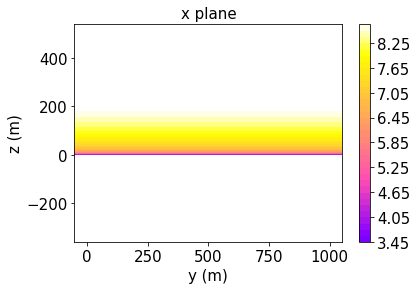

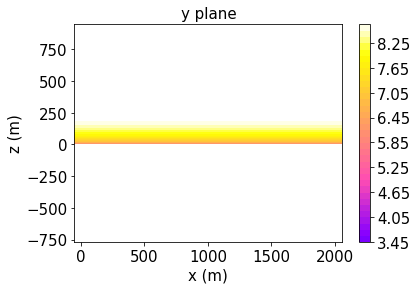


 Power Output at 90.0 degree Flow Direction = 5.832221213441924 MW 

Optimizing...
Number of parameters to optimize =  4
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5797350.659635013
            Iterations: 7
            Function evaluations: 18
            Gradient evaluations: 3
basinhopping step 0: f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5424959.582495149
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.79735e+06 trial_f -5.42496e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5468137.775577
            Iterations: 6
            Function evaluations: 14
            Gradient evaluations: 2
basinhopping step 2: f -5.79735e+06 trial_f -5.46814e+06 accepted 0  lowest_f -5.79735e+06
Positive d

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5371752.021886931
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 25: f -5.79735e+06 trial_f -5.37175e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4747928.639790019
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 26: f -5.79735e+06 trial_f -4.74793e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5120897.747176288
            Iterations: 8
            Function evaluations: 31
            Gradient evaluations: 4
basinhopping step 27: f -5.79735e+06 trial_f -5.1209e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5181592.268625689
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 50: f -5.79735e+06 trial_f -5.18159e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5755559.724110073
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 51: f -5.79735e+06 trial_f -5.75556e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5706869.538541338
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 52: f -5.79735e+06 trial_f -5.70687e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5757211.477516694
            Iterations: 11
            Function evaluations: 49
            Gradient evaluations: 7
basinhopping step 75: f -5.79735e+06 trial_f -5.75721e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5022189.239195857
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 76: f -5.79735e+06 trial_f -5.02219e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5771347.690559797
            Iterations: 12
            Function evaluations: 55
            Gradient evaluations: 8
basinhopping step 77: f -5.79735e+06 trial_f -5.77135e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
     

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5617136.096482518
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 98: f -5.79735e+06 trial_f -5.61714e+06 accepted 0  lowest_f -5.79735e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5797317.860863309
            Iterations: 11
            Function evaluations: 49
            Gradient evaluations: 7
basinhopping step 99: f -5.79735e+06 trial_f -5.79732e+06 accepted 0  lowest_f -5.79735e+06
adaptive stepsize: acceptance rate 0.020000 target 0.500000 new stepsize 0.405 old stepsize 0.45
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5303568.834714206
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 100: f -5.79735e+06 trial_f -5.30357e+06 accepte

../imperial_floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


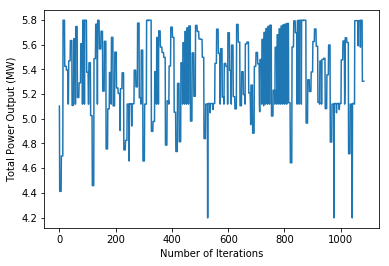

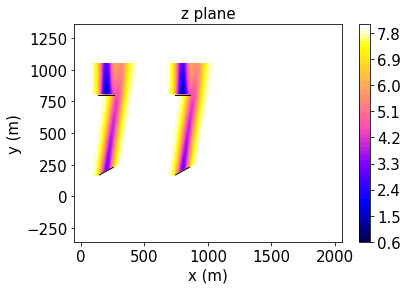

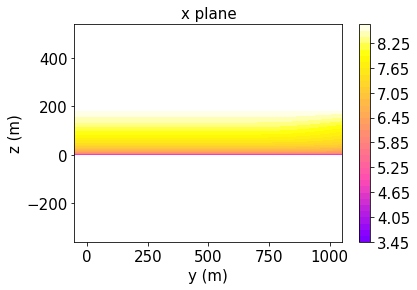

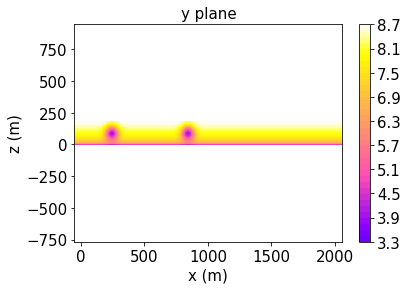


 Power Output at 0.0 degree Flow Direction = 5.902954069437379 MW 



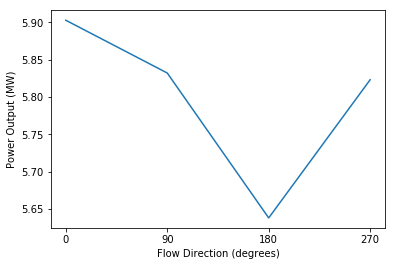

In [75]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
yaw_direction_name = '{}_yaw_direction'.format(case)

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

angles = [0.0, 90.0, 180.0, 270.0]
power = []

for a in range(len(angles)):
    yaw_direction_floris = Floris('{}.json'.format(case))
    yaw_direction_floris.farm.flow_field.wind_direction = np.radians(angles[a])
    #yaw_direction_floris.farm.flow_field.calculate_wake()
    # compute the optimal yaw angles
    yaw_direction_opt_params, yaw_direction_opt_power, yaw_direction_data = optimisation_manager.optimise_func(yaw_direction_floris, yaw_variables, minimum_values, maximum_values, yaw_direction_name, case, global_search=True)

    flow_field_viz = yaw_direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, yaw_direction_name, plot_wakes=True)
    power.append(optimisation_manager.calc_power(yaw_direction_floris) / 10**6)
    print('\n Power Output at {} degree Flow Direction = {} MW \n'.format(270.0 - angles[a], power[a]))
    
fig, ax = plt.subplots()
ax.plot(270.0 - np.asarray(angles), power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')
ax.set_xticks(angles)